## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In this Notebook, we are going to analyse the dataset (taken from Kaggle) of all the Apps in the Google Play Store
The series of steps followed are :
1. Importing Packages
2. Reading Data
3. Data Preprocessing
- 3.1 Handling NULL Values
- 3.2 Handling Data Types and Values
4. Analyzing Features
5. Furthur Analysis.
 - Unsupervised Methods.
 - Supervised Methods.
6.Conclusions

# 1.Importing the required packages

In [85]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import scale
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from flask import Flask, render_template, request

# 2.Reading Data

In [4]:
Playstore=pd.read_csv(r"C:\Users\Home\Desktop\project\googleplaystore.csv\googleplaystore.csv")
Playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
Playstore.shape

(10841, 13)

In [6]:
Playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 3.Data Preprocessing

3.1 Handling NULL Values:

This is a very crucial step in every analysis and model, which on doing, improves the accuracy of insights and predictions.

In [7]:
Playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are many NULL values in Rating, and few in Type,Content Rating and Versions.

In [8]:
Playstore.dropna(inplace=True) #Dropping Rows with Null values

In [9]:
Playstore.shape

(9360, 13)

In [10]:
Playstore.drop_duplicates(inplace=True)

In [11]:
Playstore.shape

(8886, 13)

After removing the rows with Null values and the duplicate entries, We have got 8886 apps to analyze for their ratings and performance.

3.2 Handling Data Types of each Feature:

The data types of each feature must be changed to a proper format that can be used for analysis.

In [12]:
Playstore.dtypes # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The feature Reviews must be of numerical type. So we should change it.

In [13]:
Playstore.Reviews=Playstore.Reviews.astype('int64')#Changing to int type.

Other Features like Size, Installs, Price and Android Vers also must be of numeric type.
The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
Example : '10000+' to 10000

* Changing the Feature : Installs

In [14]:
newInstalls = []

for row in Playstore.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

Playstore.Installs = newInstalls

Playstore.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

* Changing the feature : Size

In [15]:
newSize = []

for row in Playstore.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
Playstore.Size = newSize

Playstore.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

* Changing the feature, Price

In [16]:
newPrice = []

for row in Playstore.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
Playstore.Price = newPrice

Playstore.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

* Changing the feature, Android Ver

In [17]:
newVer = []

for row in Playstore['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
Playstore['Android Ver'] =  newVer

Playstore['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

# 4. Analyzing Features :

4.1 Categories

Displaying all the categories and their counts.

In [18]:
Playstore.Category.value_counts() 

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

<AxesSubplot:>

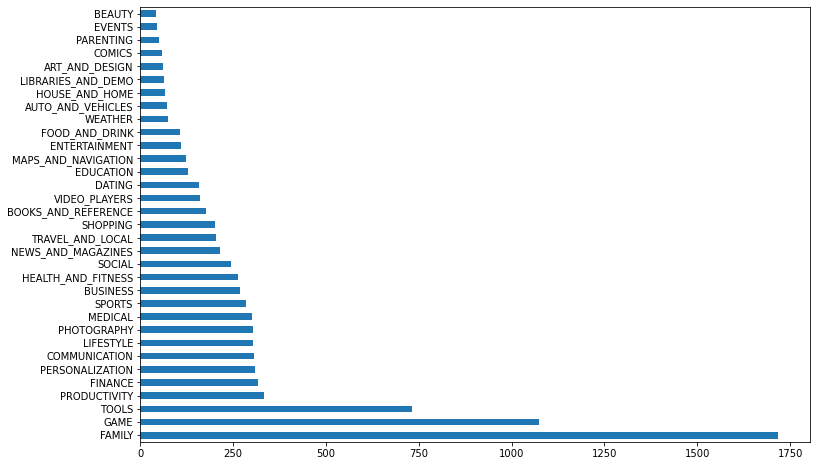

In [19]:
Playstore.Category.value_counts().plot(kind='barh',figsize= (12,8))

Insight : Maximum Number of Apps belong to the Family and Game Category.

4.2 Rating

In [20]:
Playstore.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Distribution Plot of 'Rating'

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

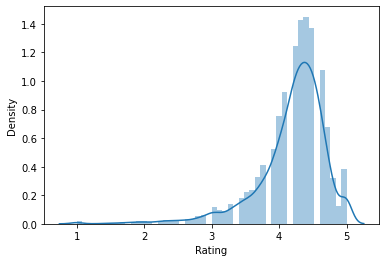

In [21]:
sns.distplot(Playstore.Rating)

Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

In [22]:
print("No. of Apps with full ratings: ",Playstore.Rating[Playstore['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


There are 271 Apps in the store which hold 5.0 Ratings. Do all of these actually deserve it? Or are these spammed ratings? Lets analyze furthur.

4.3 Consider the Reviews:

Distribution Plot of the feature 'Reviews'

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

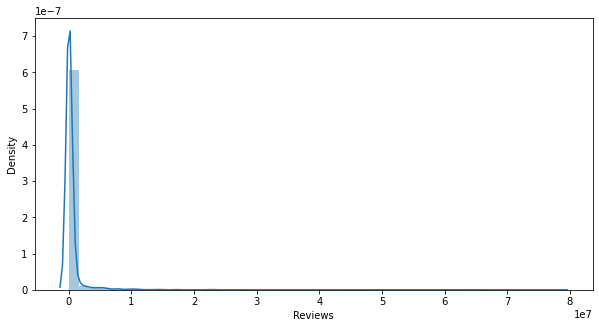

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(Playstore.Reviews)

Let's look into those apps which have a good amount of Reviews.

In [24]:
Playstore[Playstore.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


Insight : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

Note : And I still have to figure out, how to remove the duplicate entries. My Apologies.



4.4 Type:

([<matplotlib.patches.Wedge at 0x237eca1c430>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

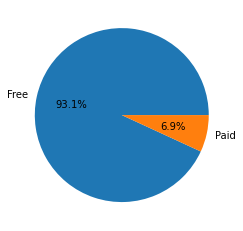

In [25]:
plt.pie(Playstore.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

Insight: 93% of the Apps are Free in the Play Store.

4.5 Price

In [26]:
Playstore[Playstore.Price == Playstore.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


Insight : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!

4.6 Android Version

In [27]:
Playstore['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

Count Plot of the various Versions

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Android Ver', ylabel='count'>

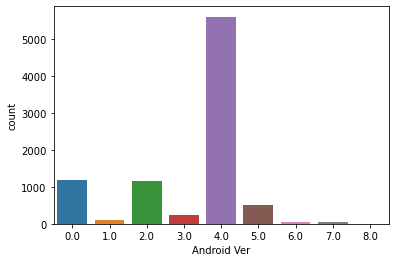

In [28]:
sns.countplot(Playstore['Android Ver'])

Insight : Most of the apps support Android 4.0 and above.

# 5. Furthur Analysis

Looking at the Apps with 5.0 ratings:

In [29]:
Playstore_full = Playstore[Playstore.Rating == 5]

Playstore_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


Distribution plot of 'Installs' of Apps with 5.0 Ratings

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Installs', ylabel='Density'>

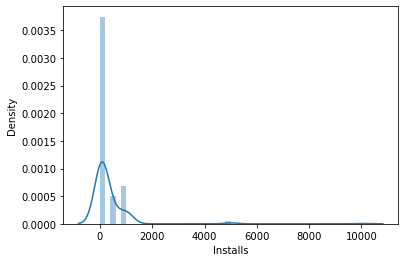

In [30]:
sns.distplot(Playstore_full.Installs)

In [31]:
Playstore_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

Insight : There are many Apps that have full ratings but less downloads/installs. So we can't really consider those apps as the best ones.

Consider the Apps with 5.0 Ratings and Maximum Installs :

In [32]:
Playstore_full_maxinstalls = Playstore_full[Playstore.Installs > 1000]
Playstore_full_maxinstalls[['App', 'Category', 'Installs','Rating']]

C:\Users\Home\AppData\Local\Temp\ipykernel_14960\2678389387.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Playstore_full_maxinstalls = Playstore_full[Playstore.Installs > 1000]


,App,Category,Installs,Rating
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0,5.0
8058,Oración CX,LIFESTYLE,5000.0,5.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0,5.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0,5.0


Checking the No. of Reviews of 5.0 Rating Apps

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

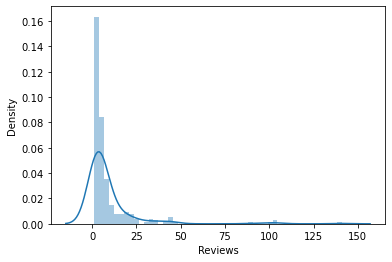

In [33]:
sns.distplot(Playstore_full.Reviews)

The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.
So let's filter out the ones with more than 30 reviews. These filtered ones are the apps that really stand for 5.0 rating.

In [34]:
Playstore_full = Playstore_full[Playstore.Reviews > 30]

C:\Users\Home\AppData\Local\Temp\ipykernel_14960\2540677971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Playstore_full = Playstore_full[Playstore.Reviews > 30]


In [35]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",Playstore_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genres', ylabel='count'>

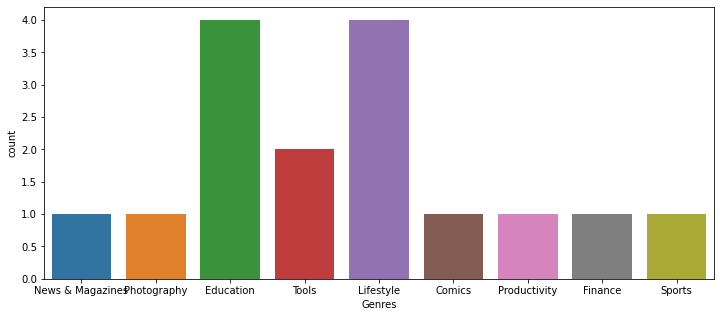

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(Playstore_full.Genres)

Insight : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

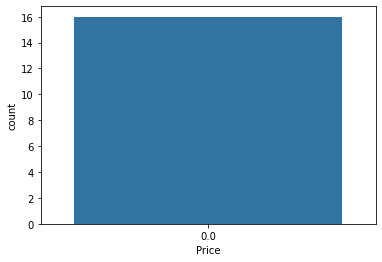

In [37]:
sns.countplot(Playstore_full.Price)

Insight : All the Apps with 5.0 ratings are Free to install.

# Unsupervised Methods

In [38]:
x=Playstore.drop(["Category","Installs"],axis=1)
y=Playstore["Installs"]

In [39]:
x

,App,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,3.9,967,14.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0
3,Sketch - Draw & Paint,4.5,215644,25.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,4.0,7,2.6,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.0
10836,Sya9a Maroc - FR,4.5,38,53.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.0
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.0
10839,The SCP Foundation DB fr nn5n,4.5,114,0.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,0.0


In [40]:
y

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8886, dtype: float64

In [41]:
x_transformed= OrdinalEncoder().fit_transform(x) 

In [42]:
# Preparing the data- Scaling/ Handling the data in such way they can belong in a spesific range
# and represent the same degree of difference
scaled_data= scale(x_transformed)

In [43]:
scaled_data

array([[ 0.70909178, -0.1697994 , -0.99556062, ..., -0.20600172,
        -1.29806986,  0.50615525],
       [-0.84620985, -0.55426557, -0.70643486, ..., -0.44782642,
        -0.33436335,  0.50615525],
       [ 1.35137924,  0.98359911,  0.94857861, ..., -1.52504552,
        -0.93653736,  0.50615525],
       ...,
       [-0.18273877,  1.56029837, -1.07530172, ...,  0.18657084,
        -1.30263178,  0.50615525],
       [ 1.25520559,  0.59913294, -1.01871126, ..., -0.40071771,
         1.52462079, -2.12292294],
       [ 1.6568471 ,  0.59913294,  1.45892159, ...,  0.04524472,
         1.52462079, -2.12292294]])

In [44]:
len(np.unique(y))

19

In [45]:
y.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [46]:
# Hierarchical agglomerative clustering - bottom-up approach
n_samples, n_features = scaled_data.shape 
n_digits = len(np.unique(y)) 
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine") 
model.fit(scaled_data) 

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=19)

In [47]:
print (model.labels_)

[10  8 10 ...  8  1  1]


In [48]:
print (metrics.silhouette_score(scaled_data,model.labels_))
print (metrics.completeness_score(y, model.labels_))
print (metrics.homogeneity_score(y, model.labels_))

0.08047605967153028
0.13797390842527352
0.14807731311542197


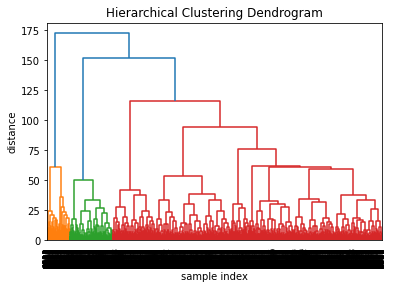

In [49]:
# Creating Hierarchical Clustering Dendrogram

model= linkage(scaled_data, "ward")
plt.figure()
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("sample index")
plt.ylabel("distance")
dendrogram(model, leaf_rotation=90.,  leaf_font_size=8.)
plt.show()

In [50]:
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(y))
for k in range(2, 15): 
    kmeans = cluster.KMeans(n_clusters=k)   
    kmeans.fit(scaled_data)  
    print(k)    
    print(metrics.silhouette_score(scaled_data, kmeans.labels_))
    print(metrics.completeness_score(y, kmeans.labels_))    
    print(metrics.homogeneity_score(y, kmeans.labels_)) 
    
# different results on every iteration because we are using random starting points# best score seems to be when k=13 (sometimes when k=14)

2
0.19512666122121675
0.1772352227974184
0.03089224345543299
3
0.22693873862737815
0.18376532635627083
0.048231366978553895
4
0.20706117183915493
0.12963878219374478
0.052500007995839953
5
0.16086197078615597
0.22820485482709713
0.13117519237203146
6
0.16520819494468553
0.2113986064852894
0.13988409988255615
7
0.15419342343706186
0.18920862392388837
0.14131633191044074
8
0.15405428827976267
0.18535488765252955
0.14195426292681435
9
0.15037331709339014
0.16327097474889832
0.13533994844369437
10
0.1473226674950332
0.1559213811414562
0.13750415956020437
11
0.14824603398480019
0.15109421622182687
0.13828370501171433
12
0.14716036979146047
0.1608314884125856
0.15237226229854367
13
0.1478442561310819
0.15297141870638786
0.1499225949076283
14
0.15412580983981658
0.1635160354839918
0.16087575150100397


In [51]:
for k in range(2, 15): 
    kmeans = cluster.KMeans(n_clusters=k)   
    kmeans.fit(scaled_data)  
    print(k)    
    print(metrics.silhouette_score(scaled_data, kmeans.labels_))
    y_silhouette=metrics.silhouette_score(scaled_data, kmeans.labels_)
    
    print(metrics.completeness_score(y, kmeans.labels_))    
    y_completeness=metrics.completeness_score(y, kmeans.labels_)
    
    
    print(metrics.homogeneity_score(y, kmeans.labels_)) 
    y_homogeneity=(metrics.homogeneity_score(y, kmeans.labels_))
    


2
0.3969678059299939
0.17759958085209232
0.017735152307616384
3
0.22693873862737815
0.18376532635627083
0.048231366978553895
4
0.20690675191334595
0.13055128214621295
0.052949882942160555
5
0.16105116752228876
0.24353546644035054
0.1396755519605508
6
0.16519746465079996
0.21178999799603918
0.14014308668522799
7
0.15431275178090434
0.19136058814333842
0.14289068853743483
8
0.15420923058054745
0.19193664016562065
0.14692298250425867
9
0.15049162922810574
0.16551864413337689
0.13717101364611178
10
0.15466917418786816
0.1715265095806062
0.14631323059968035
11
0.14605325977429187
0.17113008108444344
0.15675302002614558
12
0.15385481101460324
0.15658324691393208
0.14680909182088422
13
0.14626512200188413
0.15597113088637585
0.15166684009983625
14
0.14241619230125174
0.15194470755306572
0.15348242429019202


In [52]:
print ("silhouette scores are:\n{}".format(y_silhouette))

silhouette scores are:
0.14241619230125174


In [53]:
print ("completeness scores are:\n{}".format(y_completeness))

completeness scores are:
0.15194470755306572


In [54]:
print ("homogeneity scores are:\n{}".format(y_homogeneity))

homogeneity scores are:
0.15348242429019202


# Supervised Methods

In [55]:
x=Playstore[["Rating","Reviews","Size","Price","Android Ver"]]
y=Playstore["Installs"]

In [56]:
x

,Rating,Reviews,Size,Price,Android Ver
0,4.1,159,19.0,0.0,4.0
1,3.9,967,14.0,0.0,4.0
2,4.7,87510,8.7,0.0,4.0
3,4.5,215644,25.0,0.0,4.0
4,4.3,967,2.8,0.0,4.0
...,...,...,...,...,...
10834,4.0,7,2.6,0.0,4.0
10836,4.5,38,53.0,0.0,4.0
10837,5.0,4,3.6,0.0,4.0
10839,4.5,114,0.0,0.0,0.0


In [57]:
y

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8886, dtype: float64

In [58]:
x=x.values#attributes
y=y.values#target

In [59]:
supervised_x_transformed= OrdinalEncoder().fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=0)

In [61]:
print("LOGISTIC REGRESSION") 
lm = LogisticRegression()
lm.fit(x_train,y_train)
lm.predict_proba(x_test)

LOGISTIC REGRESSION


C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[5.25798346e-02, 5.25798362e-02, 5.25798836e-02, ...,
        5.26902272e-02, 5.26900476e-02, 5.26900206e-02],
       [5.10676743e-02, 5.10676870e-02, 5.10678206e-02, ...,
        5.44265682e-02, 5.44257159e-02, 5.44261984e-02],
       [4.96671230e-02, 4.96671464e-02, 4.96674611e-02, ...,
        5.60413765e-02, 5.60394373e-02, 5.60402982e-02],
       ...,
       [3.91308700e-25, 3.91386575e-25, 3.92139866e-25, ...,
        1.52053012e-01, 1.50199471e-01, 1.51383238e-01],
       [4.20590436e-02, 4.20591116e-02, 4.20598446e-02, ...,
        6.49606224e-02, 6.49537751e-02, 6.49577216e-02],
       [5.23051376e-02, 5.23051406e-02, 5.23051696e-02, ...,
        5.30054471e-02, 5.30052711e-02, 5.30053695e-02]])

In [62]:
print(lm.intercept_)

[-1.91010824e-08 -1.86636395e-08 -1.43621202e-08 -1.53099251e-08
  1.53148372e-09 -5.61351098e-09  2.85047647e-08  9.83904344e-09
  4.74319938e-08  1.26459705e-08  5.79624760e-08  1.59005832e-08
  6.12621885e-08  1.93353921e-09  2.18954076e-08 -3.65591831e-08
 -3.72893638e-08 -5.42849829e-08 -5.77236426e-08]


In [63]:
print(lm.coef_)

[[-7.81762868e-08 -1.63190400e-04 -6.79484628e-07 -2.90855771e-08
  -6.66033671e-08]
 [-7.62442471e-08 -1.63189118e-04 -6.78821221e-07 -2.92663884e-08
  -6.41974276e-08]
 [-5.62239466e-08 -1.63176729e-04 -5.42048229e-07 -2.20573192e-08
  -4.94701880e-08]
 [-6.15899679e-08 -1.63171318e-04 -4.65838787e-07 -2.69778476e-08
  -5.26781414e-08]
 [ 1.17977818e-08 -1.63020251e-04  3.67252415e-08  1.59652213e-08
   1.01673940e-08]
 [-2.20971619e-08 -1.62963965e-04 -2.92881822e-07 -2.13794285e-08
  -1.60794958e-08]
 [ 1.14776470e-07 -1.61139542e-04  9.29701868e-07  1.38441135e-07
   1.04210019e-07]
 [ 3.78823420e-08 -1.60047575e-04  8.35889511e-07  7.37489779e-08
   3.59640883e-08]
 [ 1.90027798e-07 -1.39245554e-04  2.21358583e-06  1.13942664e-07
   1.66453313e-07]
 [ 5.02913681e-08 -1.32260946e-04  4.54187885e-07  1.24832731e-08
   4.30643434e-08]
 [ 2.38573368e-07  9.55994133e-05  1.80267452e-06  2.81254445e-08
   1.95638743e-07]
 [ 6.74828123e-08  1.71848720e-04  2.95140781e-07 -2.69876478e-08

In [64]:
predicted = lm.predict(x_test)
print(metrics.classification_report(y_test, predicted)) 
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         1
       100.0       0.00      0.00      0.00        17
       500.0       0.00      0.00      0.00        11
      1000.0       0.00      0.00      0.00        41
      5000.0       0.00      0.00      0.00        25
     10000.0       0.00      0.00      0.00        72
     50000.0       0.00      0.00      0.00        22
    100000.0       0.00      0.00      0.00        45
    500000.0       0.00      0.00      0.00        25
   1000000.0       0.00      0.00      0.00        66
   5000000.0       0.00      0.00      0.00        36
  10000000.0       0.00      0.00      0.00        55
  50000000.0       0.00      0.00      0.00        13
 100000000.0       0.03      1.00      0.06        10
 500000000.0       0.00      0.00      0.00         3
1000000000.0       0.00      0.00      0.00         2

    accuracy              

C:\Users\Home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print("KNN")
model = KNeighborsClassifier()
model.fit(x_train,y_train) 
print(model)

KNN
KNeighborsClassifier()


In [66]:
predicted= model.predict(x_test)
print (metrics.classification_report(y_test, predicted))
print (metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

        10.0       0.25      1.00      0.40         1
        50.0       0.00      0.00      0.00         1
       100.0       0.47      0.41      0.44        17
       500.0       0.20      0.09      0.13        11
      1000.0       0.40      0.41      0.41        41
      5000.0       0.31      0.40      0.35        25
     10000.0       0.56      0.53      0.54        72
     50000.0       0.20      0.18      0.19        22
    100000.0       0.40      0.53      0.46        45
    500000.0       0.20      0.12      0.15        25
   1000000.0       0.48      0.58      0.52        66
   5000000.0       0.26      0.19      0.22        36
  10000000.0       0.64      0.62      0.63        55
  50000000.0       0.62      0.38      0.48        13
 100000000.0       0.73      0.80      0.76        10
 500000000.0       0.50      0.67      0.57         3
1000000000.0       1.00      0.50      0.67         2

    accuracy              

In [67]:
print (metrics.accuracy_score(y_test, predicted))

0.449438202247191


In [69]:
modeldtc = DecisionTreeClassifier()
modeldtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
modeldtc.score(x_test,y_test)

0.5123595505617977

In [73]:
dist = {}
for i in [0,1,42,101,110,575,684,786,506,454,455]:
    rf_reg = RandomForestClassifier(random_state=i)
    rf_reg.fit(x_train, y_train)
    dist[i] = rf_reg.score(x_test,y_test)

In [74]:
dist

{0: 0.5662921348314607,
 1: 0.5617977528089888,
 42: 0.5685393258426966,
 101: 0.5887640449438202,
 110: 0.5662921348314607,
 575: 0.5707865168539326,
 684: 0.5617977528089888,
 786: 0.5707865168539326,
 506: 0.5685393258426966,
 454: 0.5730337078651685,
 455: 0.550561797752809}

In [76]:
rf_reg = RandomForestClassifier(random_state=454)
rf_reg.fit(x_train,y_train)

RandomForestClassifier(random_state=454)

In [79]:
rf_reg.score(x_test,y_test)

0.5730337078651685

In [80]:
def LogisticReg(x_train,y_train,x_test,y_test):
    modelLogistic=LogisticRegression()
    modelLogistic.fit(x_train,y_train)
    return modelLogistic.score(x_test,y_test)
    #return mean_squared_error(y_test, modelLogistic.predict(x_test), squared=False)
def DecisionTreeClf(x_train,y_train,x_test,y_test):
    modeldtc = DecisionTreeClassifier(random_state=42)
    modeldtc.fit(x_train,y_train)
    return modeldtc.score(x_test,y_test)
    #return mean_squared_error(y_test, modeldtc.predict(x_test), squared=False)
def RandomForestClf(x_train,y_train,x_test,y_test):
    modelrfc = RandomForestClassifier(max_depth=2, random_state=42)
    modelrfc.fit(x_train,y_train)
    return modelrfc.score(x_test,y_test)
    #return mean_squared_error(y_test, modelrfc.predict(x_test), squared=False)
def GradientBoostingClf(x_train,y_train,x_test,y_test):
    modelgbc = GradientBoostingClassifier(n_estimators=100,max_depth=2, random_state=42)
    modelgbc.fit(x_train,y_train)
    return modelgbc.score(x_test,y_test)
    #return mean_squared_error(y_test, modelgbc.predict(x_test), squared=False)
def AdaBoostClf(x_train,y_train,x_test,y_test):
    modelabc = AdaBoostClassifier(random_state=45)
    modelabc.fit(x_train,y_train)
    return modelabc.score(x_test,y_test)

In [82]:
reg = [LogisticReg(x_train,y_train,x_test,y_test),DecisionTreeClf(x_train,y_train,x_test,y_test),RandomForestClf(x_train,y_train,x_test,y_test),GradientBoostingClf(x_train,y_train,x_test,y_test),AdaBoostClf(x_train,y_train,x_test,y_test)]

C:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
reg

[0.02247191011235955,
 0.4966292134831461,
 0.42247191011235957,
 0.5617977528089888,
 0.2898876404494382]

In [ ]:
app = Flask(__name__,template_folder=r'C:\Users\Home\Desktop\template')
Playstore = pd.read_csv(r"C:\Users\Home\Desktop\project\googleplaystore.csv\googleplaystore.csv")
Playstore = df.drop(['App','Last Updated','Current Ver','Installs'],axis=1)
l = list(Playstore.columns)
k = list(Playstore.columns)
@app.route('/')
def index():
    return render_template('index.html')
@app.route('/getting', methods=['POST'])
def getting():
    name = request.form['name']
    cat = request.form['cat']
    rat = request.form['rat']
    rev = request.form['rev']
    siz = request.form['size']
    typ = request.form['type']
    pri = request.form['price']
    cr = request.form['cr']
    gr = request.form['gr']
    ar = request.form['ar']
    df5['App'] = name
    df2['Rating'] = rat
    df5['Rating']= rat
    df5['Reviews']= rev
    df5['Price']= pri
    df2['Reviews'] = rev
    df2['Price'] = pri
    for j in range(0,len(k)):
        if(l[0]+'_'+cat == k[j]):
            df2[l[0]+'_'+cat ] = 1
            df5[l[0]] = cat
    for j in range(0,len(k)):
        if(l[3]+'_'+siz == k[j]):
            df2[l[3]+'_'+siz] = 1
            df5[l[3]] = siz
    for j in range(0,len(k)):
        if(l[4]+'_'+typ == k[j]):
            df2[l[4]+'_'+typ ] = 1
            df5[l[4]] = typ
    for j in range(0,len(k)):
        if(l[6]+'_'+cr == k[j]):
            df2[l[6]+'_'+cr]  = 1
            df5[l[6]] = cr
    for j in range(0,len(k)):
        if(l[7]+'_'+gr == k[j]):
            df2[l[7]+'_'+gr ] = 1
            df5[l[7]] = gr
    for j in range(0,len(k)):
        if(l[8]+'_'+ar == k[j]):
            df2[l[8]+'_'+ar ] = 1
            df5[l[8]] = ar
    df2.fillna(0,inplace=True)
    return render_template('op.html',ds = df5.to_html(),pred = model.predict(df2),name = name)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Jul/2022 11:56:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jul/2022 11:56:53] "GET /uploads/media/default/0001/01/b5edc1bad4dc8c20291c8394527cb2c5b43ee13c.jpeg HTTP/1.1" 404 -
127.0.0.1 - - [27/Jul/2022 12:07:09] "GET /Project.docx HTTP/1.1" 404 -


# 6.Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.